In [765]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [802]:
df = pd.read_csv('dataset/data.csv', usecols=['horsepower','price'])
x = df['horsepower'].values
x = x[:,np.newaxis]
y = df['price']
df.describe()

,horsepower,price
count,200.000000,200.000000
mean,103.320000,13230.375000
std,37.468615,7960.155239
min,48.000000,5118.000000
25%,70.000000,7775.000000
50%,95.000000,10320.000000
75%,116.000000,16500.750000
max,262.000000,45400.000000


In [807]:
df.head()

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0


{'whiskers': [<matplotlib.lines.Line2D at 0x25b297e8cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x25b297f4e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b297f09c8>],
 'medians': [<matplotlib.lines.Line2D at 0x25b297f8cc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b297facc8>],
 'means': []}

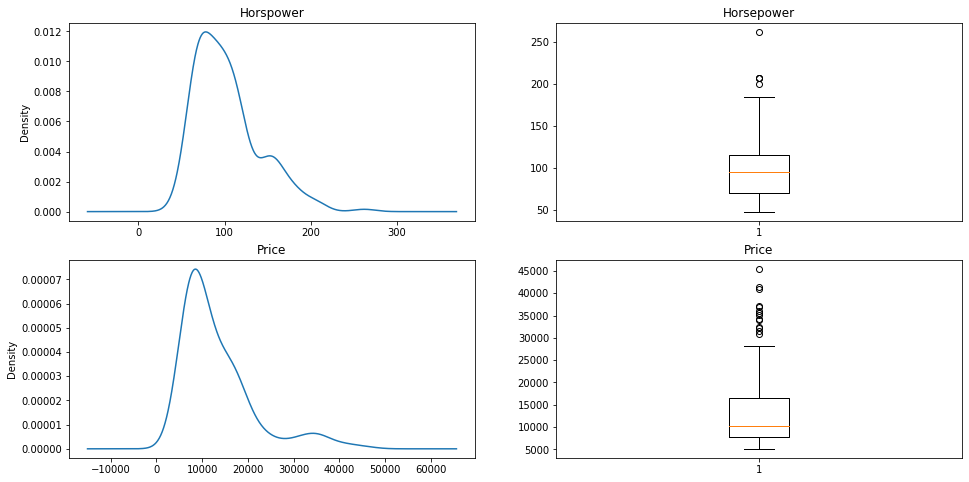

In [767]:
#univariat analysis
plot = plt.figure(figsize=(16,8))

plot.add_subplot(2,2,1)
plt.title("Horspower")
df['horsepower'].plot(kind="kde")

plot.add_subplot(2,2,2)
plt.title("Horsepower")
plt.boxplot(df['horsepower'])

plot.add_subplot(2,2,3)
plt.title("Price")
df['price'].plot(kind="kde")

plot.add_subplot(2,2,4)
plt.title('Price')
plt.boxplot(df['price'])


Text(0, 0.5, 'harga')

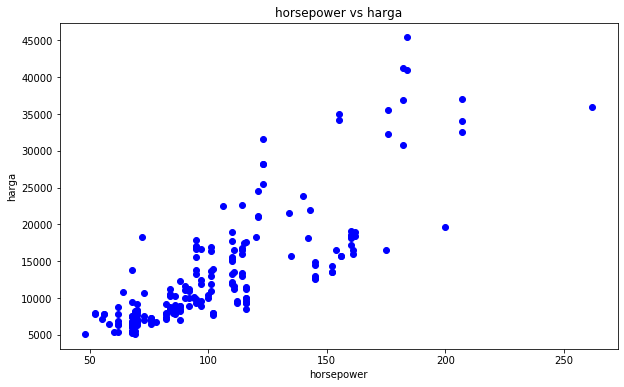

In [768]:
#distribusi positif
#semakin besar horsepower semakin naik harga

plt.subplots(figsize= (10,6))
plt.scatter(x,y,color='blue')
plt.title("horsepower vs harga")
plt.xlabel('horsepower')
plt.ylabel('harga')


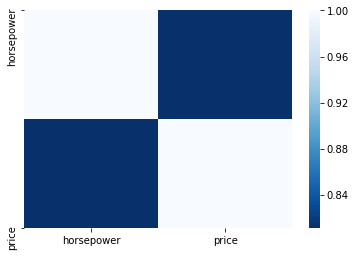

In [769]:
#korelasi data

sns.heatmap(df.corr(),annot=False,cmap="Blues_r")

In [770]:
#rumus linearregression 1 variabel = y = mx+b+e
# y = target
# m = coefisien
# x = fitur
# b = intercept
# e = mse

reg = LinearRegression()

In [779]:
#split data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [780]:
m = float(reg.coef_)
b = float(reg.intercept_)
m,b

(171.29827884964612, -4601.97446634428)

In [796]:
r2 = reg.score(x_test,y_test)
r2

0.8191473381044058

Text(0, 0.5, 'harga')

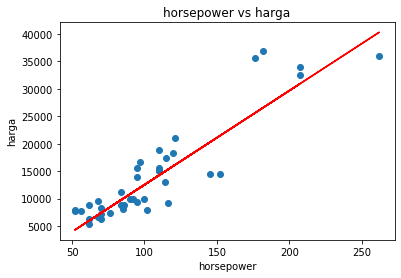

In [797]:
#asumsi 
y_pred = reg.predict(x_test)
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred, color="red")
plt.title("horsepower vs harga")
plt.xlabel('horsepower')
plt.ylabel('harga')

In [798]:
#manual
# berapa harga mobil dengann tenaga 245

hargabaru = float((m)*245+float(b)+r2)

hargabaru

37366.92299915712

In [799]:
#library linear
# berapa harga mobil dengann tenaga 245

float(reg.predict([[245]]))

37366.10385181902

In [800]:
#berapa harga mobil dengan tenaga 120
# apakah sesuai dengan distrubusi data (semakin besar tenaga semakin naik harga)
hargabaru2 = float((m)*120 + float(b) + r2)
hargabaru2

15954.63814295136

In [801]:
#berapa harga mobil dengan tenaga 120
# apakah sesuai dengan distrubusi data (semakin besar tenaga semakin naik harga)
float(reg.predict([[120]]))

15953.818995613256